# Perqara Assessment
The next step is for you to use the data and do the following tasks:
1. Data preparation process
2. Create basic analytics on the nature of the data
3. Providing advanced analytics such as forecast, geoanalysis, outlier, RFM or clustering
4. Generate a model which can be applied to the data based on analytics above (plus value)
5. Documenting all the process and analytics result
6. Submissions must be in reproducible codes in GitHub/GitLab
7. Any language can be used to build the pipeline but Python is preferable and prioritized

Alfian Hakim

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

df = {}
df['cust'] = pd.read_csv("drive/MyDrive/assesment perqara/customers_dataset.csv")
df['geol'] = pd.read_csv("drive/MyDrive/assesment perqara/geolocation_dataset.csv")
df['orit'] = pd.read_csv("drive/MyDrive/assesment perqara/order_items_dataset.csv")
df['orpa'] = pd.read_csv("drive/MyDrive/assesment perqara/order_payments_dataset.csv")
df['orre'] = pd.read_csv("drive/MyDrive/assesment perqara/order_reviews_dataset.csv")
df['orde'] = pd.read_csv("drive/MyDrive/assesment perqara/orders_dataset.csv")
df['prcn'] = pd.read_csv("drive/MyDrive/assesment perqara/product_category_name_translation.csv")
df['prod'] = pd.read_csv("drive/MyDrive/assesment perqara/products_dataset.csv")
df['sell'] = pd.read_csv("drive/MyDrive/assesment perqara/sellers_dataset.csv")

for key in df.keys():
  print(df[key].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-n

There is some missing values on
- product dataset
- order dataset
- order review dataset

In [3]:
df['cust'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# what's the difference between customer_id and customer_unique_id?
df['cust'][['customer_id', 'customer_unique_id']].describe()

,customer_id,customer_unique_id
count,99441,99441
unique,99441,96096
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455
freq,1,17


In [6]:
df['cust'].loc[df['cust']['customer_unique_id'] == '8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
36122,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
38073,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
40141,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
48614,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
52574,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
58707,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
67996,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


In [5]:
# how many customer_unique_id that has multiple customer_id?
df_temp = df['cust']['customer_unique_id'].value_counts().reset_index().rename(columns = {'index':'customer_unique_id', 'customer_unique_id':'count'})
len(df_temp.loc[df_temp['count']>1])

2997

In [6]:
df['orde'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
df['orde'][['order_id', 'customer_id']].describe()

,order_id,customer_id
count,99441,99441
unique,99441,99441
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
freq,1,1


- customer_id is just a key value to join order dataset with customer dataset

# Clustering Seller
Trying to cluster sellers with RFM approach and additional feature (average rating and product category) to see seller segmentation

In [8]:
df['sell'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
df['orit'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_merge = pd.merge(df['sell'], df['orit'])

In [11]:
len(df_merge)

112650

In [12]:
len(df_merge[['order_id', 'seller_id']].drop_duplicates())

100010

## Frequency & Monetary

In [13]:
df_seller = df_merge[['order_id', 'seller_id']].drop_duplicates()['seller_id'].value_counts().reset_index().rename(columns = {'index':'seller_id', 'seller_id':'orders'})

In [14]:
df_seller = pd.merge(df_seller, df_merge.groupby('seller_id')[['price']].sum().reset_index().rename(columns = {'price':'revenue'}))

In [15]:
df_seller.head()

,seller_id,orders,revenue
0,6560211a19b47992c3666cc44a7e94c0,1854,123304.83
1,4a3ca9315b744ce9f8e9374361493884,1806,200472.92
2,cc419e0650a3c5ba77189a1882b7556a,1706,104288.42
3,1f50f920176fa81dab994f9023523100,1404,106939.21
4,da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57


## Recency

In [16]:
df_merge = pd.merge(df_merge, pd.merge(df['orde'], df['cust'])[['order_id', 'customer_unique_id', 'order_purchase_timestamp']])

In [17]:
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])

In [18]:
max_day = df_merge['order_purchase_timestamp'].max()
max_day

Timestamp('2018-09-03 09:06:57')

In [19]:
df_recency = df_merge.groupby('seller_id')[['order_purchase_timestamp']].max().reset_index().rename(columns = {'order_purchase_timestamp':'latest_order_date'})

In [20]:
df_recency['recency']= df_recency['latest_order_date'].apply(lambda x: (max_day - x).days)
df_recency

,seller_id,latest_order_date,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,320
1,001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26,52
2,001e6ad469a905060d959994f1b41e4f,2018-08-07 22:50:37,26
3,002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,143
4,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,262
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,2018-06-23 17:34:33,71
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2018-08-19 14:37:08,14
3092,ffeee66ac5d5a62fe688b9d26f83f534,2018-05-14 08:55:22,112
3093,fffd5413c0700ac820c7069d66d98c89,2018-08-26 19:56:12,7


In [21]:
df_seller = pd.merge(df_seller, df_recency[['seller_id', 'recency']])

In [22]:
df_merge = pd.merge(df_merge, df['orre'][['order_id', 'review_score']])

In [23]:
df_seller = pd.merge(df_seller, df_merge.groupby('seller_id')[['review_score']].mean().reset_index().rename(columns = {'review_score':'avg_rating'}))

In [24]:
df_seller.head()

,seller_id,orders,revenue,recency,avg_rating
0,6560211a19b47992c3666cc44a7e94c0,1854,123304.83,4,3.909406
1,4a3ca9315b744ce9f8e9374361493884,1806,200472.92,6,3.803931
2,cc419e0650a3c5ba77189a1882b7556a,1706,104288.42,6,4.069575
3,1f50f920176fa81dab994f9023523100,1404,106939.21,8,3.982402
4,da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57,5,4.071429


In [25]:
df_merge = pd.merge(df_merge, pd.merge(df['prod'], df['prcn'], how='left')[['product_id','product_category_name_english']].drop_duplicates())

In [26]:
df_merge = df_merge.rename(columns = {'product_category_name_english':'product_category'})

In [27]:
df_merge.loc[df_merge['product_category'].isna()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_unique_id,order_purchase_timestamp,review_score,product_category
613,166e8f1381e09651983c38b1f6f91c11,88780,imbituba,SC,346222690118b5713fed10ff0c262bda,1,fb34a3bfc66ae09f045f9613fdb7bb5c,2017-08-01 02:25:15,39.9,15.10,82550d862db88ffac284571dc04b8497,2017-07-25 01:53:48,5,NaN
614,166e8f1381e09651983c38b1f6f91c11,88780,imbituba,SC,f1ba1af891ddd14899ba97155589732f,1,fb34a3bfc66ae09f045f9613fdb7bb5c,2017-08-25 00:44:36,38.9,15.10,66395d344b3d96f787a5e8b88818f8b7,2017-08-21 00:27:44,5,NaN
712,f7496d659ca9fdaf323c0aae84176632,4156,sao paulo,SP,780865d48893bd12dd23eb85abed0c6e,1,c7858457bc43561ccb96aaa2932cb085,2017-11-17 19:26:35,279.9,28.40,f746a1410892653e77ea12afc0a2af00,2017-10-26 19:14:49,5,NaN
713,f7496d659ca9fdaf323c0aae84176632,4156,sao paulo,SP,b27a97d99c7b7966d9860555f748ec70,1,c7858457bc43561ccb96aaa2932cb085,2017-06-12 16:42:56,279.9,54.34,a8da2bd1aad621d7a9df1704075897da,2017-05-23 16:25:28,5,NaN
714,f7496d659ca9fdaf323c0aae84176632,4156,sao paulo,SP,c2320c404179d2b8805c42b8b8de9668,2,c7858457bc43561ccb96aaa2932cb085,2018-07-11 20:31:41,289.9,43.57,2d8c53115afe41713433269302e68bc6,2018-07-04 19:19:21,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112366,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,683076b91bcaf79259334f6aa80d41a3,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-13 11:32:53,27.0,16.05,7cf7ff4cfdd173d22be49c668ba75f1d,2017-02-07 11:32:53,4,NaN
112367,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,7aa50aad959e4345b45b9732bc346a6e,1,e891d4a9622cae3b9fc2ec558bda155b,2017-03-10 04:03:43,27.0,16.05,12072fd221c97ff598515f5a8b94d08e,2017-03-01 02:16:01,5,NaN
112368,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,aae373a2cc64ed2d1f262aa56e70b7e8,1,e891d4a9622cae3b9fc2ec558bda155b,2017-02-15 16:42:59,27.0,10.96,637ce3a8eb17677024b70124b5ff7040,2017-02-09 16:42:59,4,NaN
112369,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,bc34d5b185152cb88b9f5db391dcd1cb,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-11 18:05:17,27.0,16.05,9107bdcabca6373f0a08e83943f19df3,2017-04-03 17:54:02,4,NaN


- there is product that wasn't categorized

In [28]:
df_merge[['seller_id', 'product_category']].drop_duplicates()

,seller_id,product_category
0,3442f8959a84dea7ee197c632cb2df15,sports_leisure
3,8c16d1f32a54d92897cc437244442e1b,office_furniture
5,d1b65fc7debc3361ea86b5f14c68d2e2,luggage_accessories
9,d1b65fc7debc3361ea86b5f14c68d2e2,stationery
24,d1b65fc7debc3361ea86b5f14c68d2e2,fashion_bags_accessories
...,...,...
112345,f8201cab383e484733266d1906e2fdfa,cool_stuff
112356,74871d19219c7d518d0090283e03c137,cool_stuff
112358,74871d19219c7d518d0090283e03c137,food_drink
112360,e603cf3fec55f8697c9059638d6c8eb5,NaN


In [29]:
# product category with the most seller
df_merge[['seller_id', 'product_category']].drop_duplicates()['product_category'].value_counts().head(10)

health_beauty            491
sports_leisure           481
housewares               467
auto                     382
furniture_decor          370
computers_accessories    287
cool_stuff               264
toys                     251
baby                     242
garden_tools             235
Name: product_category, dtype: int64

In [30]:
# product category with the least seller
df_merge[['seller_id', 'product_category']].drop_duplicates()['product_category'].value_counts().tail(10)

computers                            8
books_imported                       7
furniture_mattress_and_upholstery    5
tablets_printing_image               5
fashion_childrens_clothes            4
home_comfort_2                       4
flowers                              3
la_cuisine                           2
security_and_services                2
cds_dvds_musicals                    1
Name: product_category, dtype: int64

- there's only 1 seller who sell music cd and dvd

In [38]:
# product category with the highest average price per product
df_merge[['price', 'product_category']].drop_duplicates().groupby('product_category').mean().reset_index().sort_values('price', ascending=False).head(10)

,product_category,price
14,computers,1323.150294
45,home_appliances_2,514.087043
64,small_appliances_home_oven_and_coffee,442.848158
0,agro_industry_and_commerce,425.304333
70,watches_gifts,414.367497
56,musical_instruments,373.596484
63,small_appliances,344.948251
19,construction_tools_safety,272.979158
50,industry_commerce_and_business,258.532785
42,garden_tools,251.022387


In [39]:
# product category with the lowest average price per product
df_merge[['price', 'product_category']].drop_duplicates().groupby('product_category').mean().reset_index().sort_values('price').head(10)

,product_category,price
35,flowers,33.778000
11,cds_dvds_musicals,55.000000
12,christmas_supplies,55.275690
23,diapers_and_hygiene,56.215833
37,food_drink,60.240928
36,food,68.656460
67,tablets_printing_image,68.912143
3,arts_and_craftmanship,70.460000
29,fashion_childrens_clothes,72.470000
24,drinks,73.945417


In [101]:
# product category with the highest average revenue per seller
df_summary = df_merge[['seller_id', 'price', 'product_category']].drop_duplicates().groupby(['seller_id', 'product_category']).sum().reset_index().groupby('product_category').agg({'seller_id':'count', 'price':'mean'}).reset_index().rename(columns={'seller_id':'no_of_sellers', 'price':'product_revenue'})
df_summary.sort_values('product_revenue', ascending=False).head(10)

,product_category,no_of_sellers,product_revenue
14,computers,8,5888.263750
70,watches_gifts,101,4993.640792
56,musical_instruments,69,1595.947971
57,office_furniture,34,1456.995000
45,home_appliances_2,46,1315.602391
0,agro_industry_and_commerce,34,1142.685000
7,bed_bath_table,195,1142.322769
64,small_appliances_home_oven_and_coffee,15,1121.882000
15,computers_accessories,287,1068.816829
63,small_appliances,103,951.526990


In [102]:
# product category with the lowest average revenue per seller
df_summary.sort_values('product_revenue').head(10)

,product_category,no_of_sellers,product_revenue
29,fashion_childrens_clothes,4,72.470000
23,diapers_and_hygiene,8,84.323750
3,arts_and_craftmanship,13,106.049231
46,home_comfort_2,4,109.442500
11,cds_dvds_musicals,1,110.000000
32,fashion_sport,10,121.093000
61,security_and_services,2,141.645000
27,fashio_female_clothing,11,144.150909
36,food,58,149.433793
37,food_drink,33,189.971212


In [114]:
_temp = df_merge[['seller_id', 'price', 'product_category']].drop_duplicates().groupby(['seller_id', 'product_category']).sum().reset_index()

In [115]:
_temp.head()

,seller_id,product_category,price
0,0015a82c2db000af6aaaf3ae2ecb0532,small_appliances,895.00
1,001cca7ae9ae17fb1caed9dfb1094831,construction_tools_construction,868.79
2,001cca7ae9ae17fb1caed9dfb1094831,garden_tools,2004.10
3,001e6ad469a905060d959994f1b41e4f,sports_leisure,250.00
4,002100f778ceb8431b7a1020ff7ab48f,furniture_decor,399.00


In [116]:
_temp=_temp.set_index('seller_id')
s=_temp['product_category'].str.get_dummies().mul(_temp['price'],axis=0).sum(level=0)

<ipython-input-116-a5e5cd7e72b2>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  s=_temp['product_category'].str.get_dummies().mul(_temp['price'],axis=0).sum(level=0)


In [117]:
s.reset_index()

,seller_id,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,868.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004.1,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001e6ad469a905060d959994f1b41e4f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0
3,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5616.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,ffcfefa19b08742c5d315f2791395ee5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,69.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3024,ffdd9f82b9a447f6f8d4b91554cc7dd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,474.6,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,783.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3025,ffeee66ac5d5a62fe688b9d26f83f534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Clustering without considering the revenue breakdown

In [42]:
df_temp = pd.get_dummies(df_merge[['seller_id', 'product_category']].drop_duplicates(), columns = ['product_category']).groupby('seller_id').sum().reset_index()

In [43]:
df_seller = pd.merge(df_seller, df_temp)

In [44]:
df_seller.head()

,seller_id,orders,revenue,recency,avg_rating,product_category_agro_industry_and_commerce,product_category_air_conditioning,product_category_art,product_category_arts_and_craftmanship,product_category_audio,product_category_auto,product_category_baby,product_category_bed_bath_table,product_category_books_general_interest,product_category_books_imported,product_category_books_technical,product_category_cds_dvds_musicals,product_category_christmas_supplies,product_category_cine_photo,product_category_computers,product_category_computers_accessories,product_category_consoles_games,product_category_construction_tools_construction,product_category_construction_tools_lights,product_category_construction_tools_safety,product_category_cool_stuff,product_category_costruction_tools_garden,product_category_costruction_tools_tools,product_category_diapers_and_hygiene,product_category_drinks,product_category_dvds_blu_ray,product_category_electronics,product_category_fashio_female_clothing,product_category_fashion_bags_accessories,product_category_fashion_childrens_clothes,product_category_fashion_male_clothing,product_category_fashion_shoes,product_category_fashion_sport,product_category_fashion_underwear_beach,product_category_fixed_telephony,product_category_flowers,product_category_food,product_category_food_drink,product_category_furniture_bedroom,product_category_furniture_decor,product_category_furniture_living_room,product_category_furniture_mattress_and_upholstery,product_category_garden_tools,product_category_health_beauty,product_category_home_appliances,product_category_home_appliances_2,product_category_home_comfort_2,product_category_home_confort,product_category_home_construction,product_category_housewares,product_category_industry_commerce_and_business,product_category_kitchen_dining_laundry_garden_furniture,product_category_la_cuisine,product_category_luggage_accessories,product_category_market_place,product_category_music,product_category_musical_instruments,product_category_office_furniture,product_category_party_supplies,product_category_perfumery,product_category_pet_shop,product_category_security_and_services,product_category_signaling_and_security,product_category_small_appliances,product_category_small_appliances_home_oven_and_coffee,product_category_sports_leisure,product_category_stationery,product_category_tablets_printing_image,product_category_telephony,product_category_toys,product_category_watches_gifts
0,6560211a19b47992c3666cc44a7e94c0,1854,123304.83,4,3.909406,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,4a3ca9315b744ce9f8e9374361493884,1806,200472.92,6,3.803931,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,cc419e0650a3c5ba77189a1882b7556a,1706,104288.42,6,4.069575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1f50f920176fa81dab994f9023523100,1404,106939.21,8,3.982402,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57,5,4.071429,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
product_cols = df_seller.iloc[:,5:].columns.tolist()
product_cols

['product_category_agro_industry_and_commerce',
 'product_category_air_conditioning',
 'product_category_art',
 'product_category_arts_and_craftmanship',
 'product_category_audio',
 'product_category_auto',
 'product_category_baby',
 'product_category_bed_bath_table',
 'product_category_books_general_interest',
 'product_category_books_imported',
 'product_category_books_technical',
 'product_category_cds_dvds_musicals',
 'product_category_christmas_supplies',
 'product_category_cine_photo',
 'product_category_computers',
 'product_category_computers_accessories',
 'product_category_consoles_games',
 'product_category_construction_tools_construction',
 'product_category_construction_tools_lights',
 'product_category_construction_tools_safety',
 'product_category_cool_stuff',
 'product_category_costruction_tools_garden',
 'product_category_costruction_tools_tools',
 'product_category_diapers_and_hygiene',
 'product_category_drinks',
 'product_category_dvds_blu_ray',
 'product_category_e

In [45]:
# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

In [46]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df_seller.iloc[:,1:])

In [47]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df_scaled)

PCA(random_state=42, svd_solver='randomized')

In [65]:
pcs_df = pd.DataFrame({ 'Feature':df_seller.iloc[:,1:].columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,orders,revenue,recency,avg_rating,product_category_agro_industry_and_commerce,product_category_air_conditioning,product_category_art,product_category_arts_and_craftmanship,product_category_audio,product_category_auto,product_category_baby,product_category_bed_bath_table,product_category_books_general_interest,product_category_books_imported,product_category_books_technical,product_category_cds_dvds_musicals,product_category_christmas_supplies,product_category_cine_photo,product_category_computers,product_category_computers_accessories,product_category_consoles_games,product_category_construction_tools_construction,product_category_construction_tools_lights,product_category_construction_tools_safety,product_category_cool_stuff,product_category_costruction_tools_garden,product_category_costruction_tools_tools,product_category_diapers_and_hygiene,product_category_drinks,product_category_dvds_blu_ray,product_category_electronics,product_category_fashio_female_clothing,product_category_fashion_bags_accessories,product_category_fashion_childrens_clothes,product_category_fashion_male_clothing,product_category_fashion_shoes,product_category_fashion_sport,product_category_fashion_underwear_beach,product_category_fixed_telephony,product_category_flowers,product_category_food,product_category_food_drink,product_category_furniture_bedroom,product_category_furniture_decor,product_category_furniture_living_room,product_category_furniture_mattress_and_uphols...,product_category_garden_tools,product_category_health_beauty,product_category_home_appliances,product_category_home_appliances_2,product_category_home_comfort_2,product_category_home_confort,product_category_home_construction,product_category_housewares,product_category_industry_commerce_and_business,product_category_kitchen_dining_laundry_garden...,product_category_la_cuisine,product_category_luggage_accessories,product_category_market_place,product_category_music,product_category_musical_instruments,product_category_office_furniture,product_category_party_supplies,product_category_perfumery,product_category_pet_shop,product_category_security_and_services,product_category_signaling_and_security,product_category_small_appliances,product_category_small_appliances_home_oven_an...,product_category_sports_leisure,product_category_stationery,product_category_tablets_printing_image,product_category_telephony,product_category_toys,product_category_watches_gifts
1,0.314473,0.297657,-0.146127,0.025707,0.109578,0.107021,0.040586,0.009738,0.245471,0.129727,0.122951,0.039852,-0.027877,0.007643,-0.026596,0.173525,0.065129,0.079633,0.026457,0.217063,0.233516,0.090969,0.066148,0.090186,0.244814,0.057222,0.081353,0.00035,-0.020313,0.04728,0.236292,0.009689,0.031317,0.010642,0.023444,0.052803,0.02779,0.013796,0.203516,0.032555,0.095944,-0.012785,-0.015352,0.061718,0.027384,0.013105,0.12969,0.073496,0.108466,0.073232,0.063103,0.086167,0.083353,0.094063,0.056765,0.02592,0.017219,0.096172,0.094196,0.069556,0.117383,0.027922,0.019486,0.074586,0.046777,0.162804,0.102902,0.093286,0.07153,0.132102,0.140431,0.08147,0.238614,0.137022,0.169404
2,-0.249835,-0.234019,0.113242,-0.062377,0.071769,0.008004,-0.029808,-0.009078,0.085091,0.066795,-0.225342,-0.217383,-0.000217,-0.009696,0.028364,0.299801,0.078071,0.060086,0.001094,0.179482,0.130526,0.052134,-0.01578,0.114877,-0.091031,0.010311,-0.003449,0.003308,0.003317,-0.00397,0.164813,-0.143452,-0.161772,-0.066865,-0.165019,-0.167796,-0.163487,-0.00519,0.229096,0.066639,0.012827,0.005297,-0.041439,-0.092236,-0.075296,-0.074293,0.055611,-0.019746,0.058858,-0.021073,-0.104986,-0.118617,0.100692,-0.103095,0.009071,-0.064617,-0.067192,-0.178801,-0.123724,-0.009615,0.067441,-0.044042,-0.08644,-0.053427,-0.007634,0.317025,0.055296,-0.055536,-0.031066,-0.0677

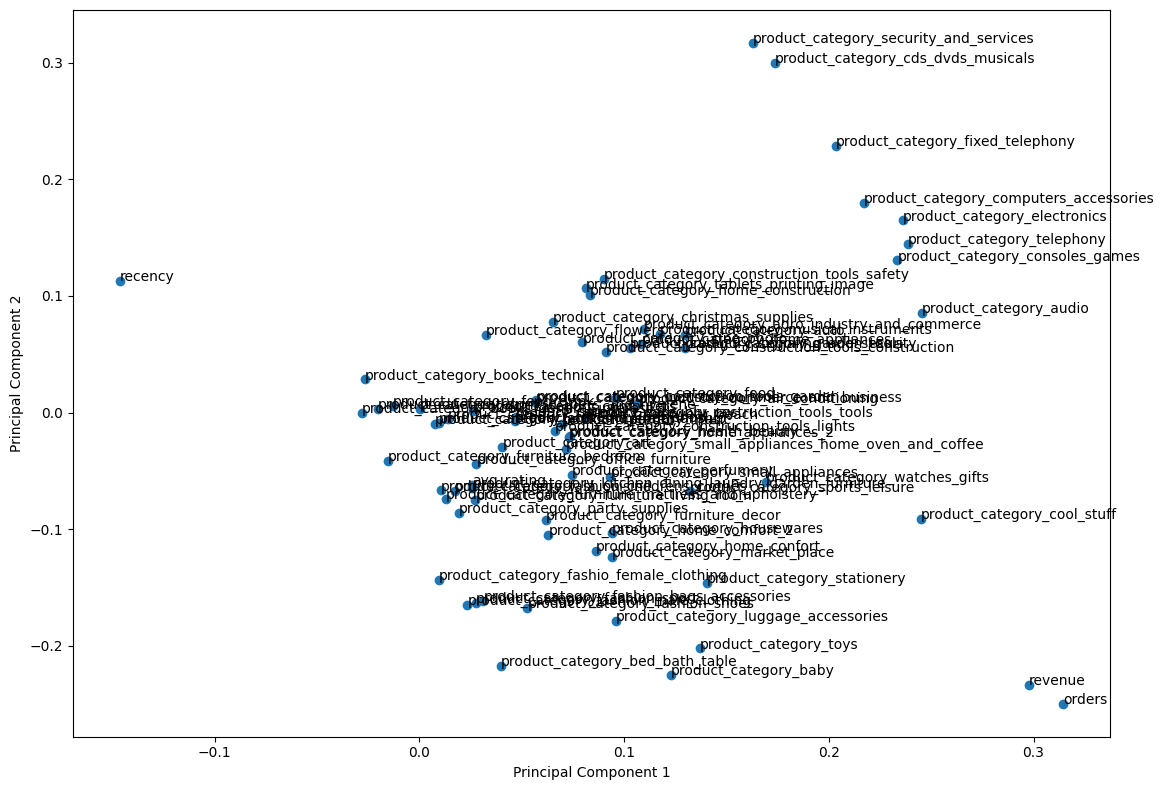

In [51]:
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [52]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

df_pca = pca_final.fit_transform(df_scaled)
df_pca.shape

(3090, 5)

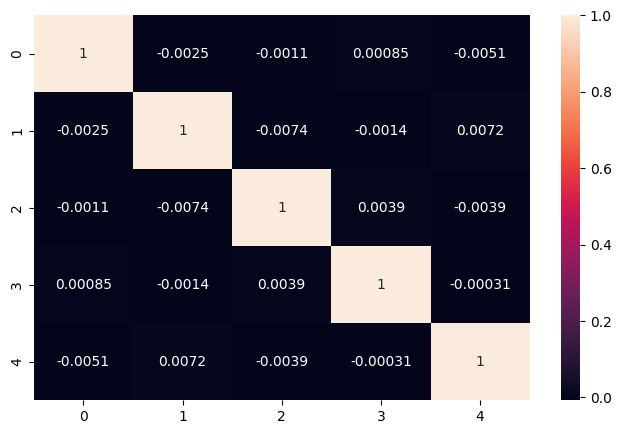

In [56]:
pc = np.transpose(df_pca)
corrmat = np.corrcoef(pc)

plt.figure(figsize = (8,5))
sns.heatmap(corrmat,annot = True)
plt.show()

In [57]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

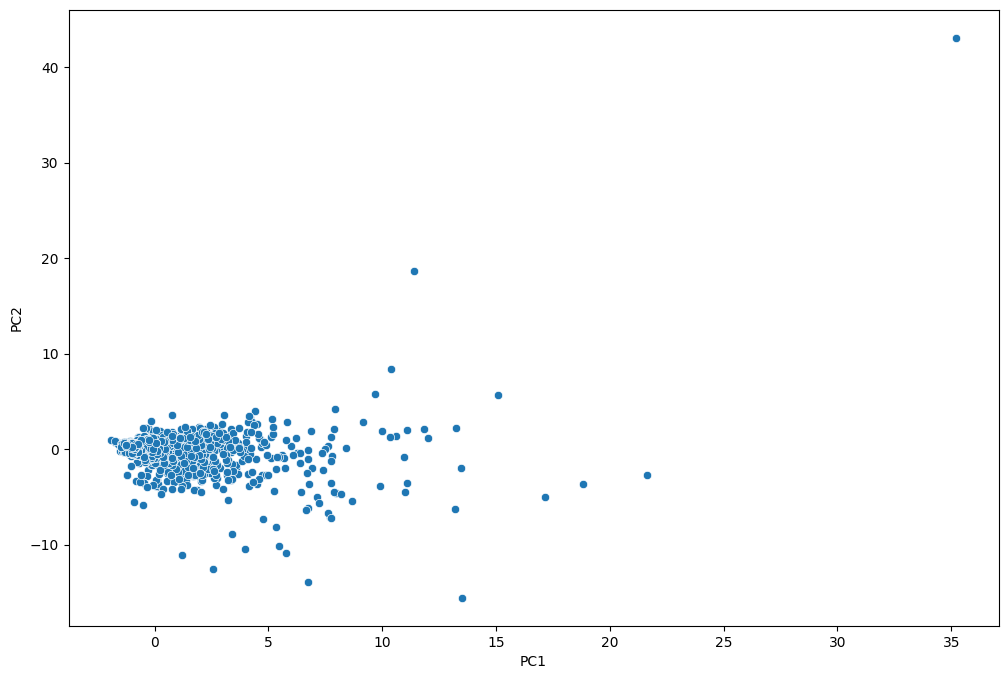

In [58]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

- there is one outlier

In [66]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [67]:
hopkins(pcs_df2)

0.9913628343839581

- hopkins value > 0.5 meaning it's good to be clustered

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

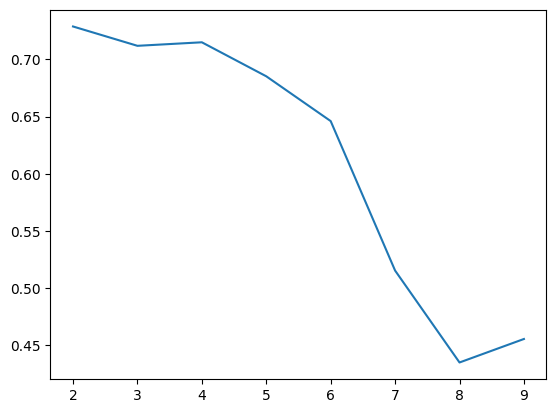

In [68]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

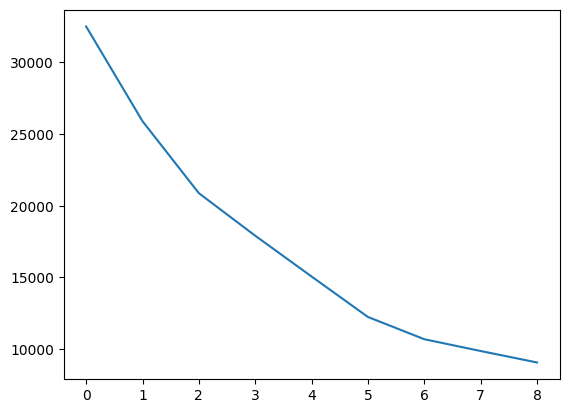

In [69]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

- we'll use k = 4

In [70]:
model_kmeans = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_kmeans.fit(pcs_df2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4, random_state=50)

In [71]:
pcs_df2 = pd.concat([pcs_df2, pd.Series(model_kmeans.labels_)], axis=1)
pcs_df2.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']

In [72]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,13.185585,-6.269092,0.223716,9.836455,1.446467,3
1,13.491334,-15.555139,4.492097,19.067294,9.428099,3
2,8.688046,-5.407912,1.083818,11.052048,2.366071,3
3,7.123832,-4.995127,2.120076,9.377461,1.765908,3
4,7.684122,-7.149086,1.985403,10.338447,3.259884,3


In [73]:
pcs_df2['ClusterID'].value_counts()

0    2858
3     188
2      43
1       1
Name: ClusterID, dtype: int64

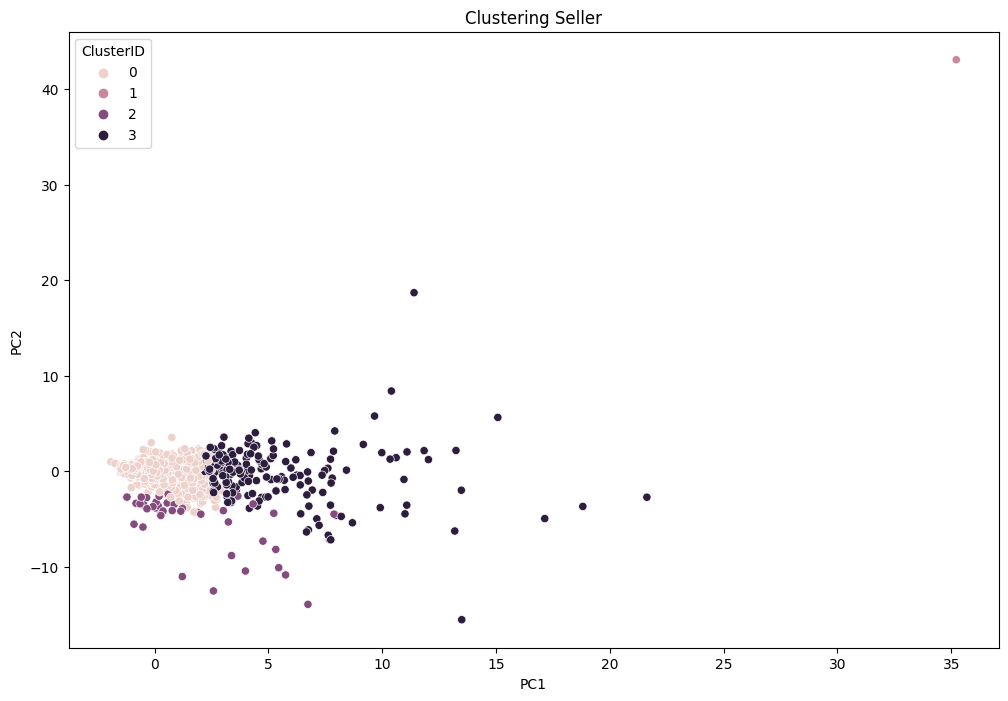

In [150]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pcs_df2)

plt.title('Clustering Seller')
plt.show()

- cluster 1 is outlier

In [75]:
df_seller=pd.merge(df_seller,pcs_df2[['ClusterID']], left_index=True,right_index=True)

In [76]:
df_seller.head()

,seller_id,orders,revenue,recency,avg_rating,product_category_agro_industry_and_commerce,product_category_air_conditioning,product_category_art,product_category_arts_and_craftmanship,product_category_audio,product_category_auto,product_category_baby,product_category_bed_bath_table,product_category_books_general_interest,product_category_books_imported,product_category_books_technical,product_category_cds_dvds_musicals,product_category_christmas_supplies,product_category_cine_photo,product_category_computers,product_category_computers_accessories,product_category_consoles_games,product_category_construction_tools_construction,product_category_construction_tools_lights,product_category_construction_tools_safety,product_category_cool_stuff,product_category_costruction_tools_garden,product_category_costruction_tools_tools,product_category_diapers_and_hygiene,product_category_drinks,product_category_dvds_blu_ray,product_category_electronics,product_category_fashio_female_clothing,product_category_fashion_bags_accessories,product_category_fashion_childrens_clothes,product_category_fashion_male_clothing,product_category_fashion_shoes,product_category_fashion_sport,product_category_fashion_underwear_beach,product_category_fixed_telephony,product_category_flowers,product_category_food,product_category_food_drink,product_category_furniture_bedroom,product_category_furniture_decor,product_category_furniture_living_room,product_category_furniture_mattress_and_upholstery,product_category_garden_tools,product_category_health_beauty,product_category_home_appliances,product_category_home_appliances_2,product_category_home_comfort_2,product_category_home_confort,product_category_home_construction,product_category_housewares,product_category_industry_commerce_and_business,product_category_kitchen_dining_laundry_garden_furniture,product_category_la_cuisine,product_category_luggage_accessories,product_category_market_place,product_category_music,product_category_musical_instruments,product_category_office_furniture,product_category_party_supplies,product_category_perfumery,product_category_pet_shop,product_category_security_and_services,product_category_signaling_and_security,product_category_small_appliances,product_category_small_appliances_home_oven_and_coffee,product_category_sports_leisure,product_category_stationery,product_category_tablets_printing_image,product_category_telephony,product_category_toys,product_category_watches_gifts,ClusterID
0,6560211a19b47992c3666cc44a7e94c0,1854,123304.83,4,3.909406,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,3
1,4a3ca9315b744ce9f8e9374361493884,1806,200472.92,6,3.803931,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
2,cc419e0650a3c5ba77189a1882b7556a,1706,104288.42,6,4.069575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,3
3,1f50f920176fa81dab994f9023523100,1404,106939.21,8,3.982402,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3
4,da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57,5,4.071429,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [77]:
df_seller.loc[df_seller['ClusterID']==1]

,seller_id,orders,revenue,recency,avg_rating,product_category_agro_industry_and_commerce,product_category_air_conditioning,product_category_art,product_category_arts_and_craftmanship,product_category_audio,product_category_auto,product_category_baby,product_category_bed_bath_table,product_category_books_general_interest,product_category_books_imported,product_category_books_technical,product_category_cds_dvds_musicals,product_category_christmas_supplies,product_category_cine_photo,product_category_computers,product_category_computers_accessories,product_category_consoles_games,product_category_construction_tools_construction,product_category_construction_tools_lights,product_category_construction_tools_safety,product_category_cool_stuff,product_category_costruction_tools_garden,product_category_costruction_tools_tools,product_category_diapers_and_hygiene,product_category_drinks,product_category_dvds_blu_ray,product_category_electronics,product_category_fashio_female_clothing,product_category_fashion_bags_accessories,product_category_fashion_childrens_clothes,product_category_fashion_male_clothing,product_category_fashion_shoes,product_category_fashion_sport,product_category_fashion_underwear_beach,product_category_fixed_telephony,product_category_flowers,product_category_food,product_category_food_drink,product_category_furniture_bedroom,product_category_furniture_decor,product_category_furniture_living_room,product_category_furniture_mattress_and_upholstery,product_category_garden_tools,product_category_health_beauty,product_category_home_appliances,product_category_home_appliances_2,product_category_home_comfort_2,product_category_home_confort,product_category_home_construction,product_category_housewares,product_category_industry_commerce_and_business,product_category_kitchen_dining_laundry_garden_furniture,product_category_la_cuisine,product_category_luggage_accessories,product_category_market_place,product_category_music,product_category_musical_instruments,product_category_office_furniture,product_category_party_supplies,product_category_perfumery,product_category_pet_shop,product_category_security_and_services,product_category_signaling_and_security,product_category_small_appliances,product_category_small_appliances_home_oven_and_coffee,product_category_sports_leisure,product_category_stationery,product_category_tablets_printing_image,product_category_telephony,product_category_toys,product_category_watches_gifts,ClusterID
28,4e922959ae960d389249c378d1c939f5,420,46030.37,5,3.895323,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1


In [82]:
df_seller.drop(product_cols, axis=1).groupby('ClusterID').agg(['mean', 'median'])

<ipython-input-82-0abe9f58ffac>:1: FutureWarning: ['seller_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_seller.drop(product_cols, axis=1).groupby('ClusterID').agg(['mean', 'median'])


orders              revenue                recency         \
                 mean median          mean     median        mean median   
ClusterID                                                                  
0           20.141008    6.0   2894.406879    730.335  145.972008   60.0   
1          420.000000  420.0  46030.370000  46030.370    5.000000    5.0   
2           86.697674   44.0  10069.260698   4177.280  140.116279   38.0   
3          203.691489   68.0  25706.183298   8526.710   50.696809   15.0   

          avg_rating            
                mean    median  
ClusterID                       
0           3.973401  4.193548  
1           3.895323  3.895323  
2           3.838890  4.042169  
3           4.003582  4.084618

In [83]:
df_seller.groupby('ClusterID')[product_cols].agg(['mean'])

,product_category_agro_industry_and_commerce,product_category_air_conditioning,product_category_art,product_category_arts_and_craftmanship,product_category_audio,product_category_auto,product_category_baby,product_category_bed_bath_table,product_category_books_general_interest,product_category_books_imported,product_category_books_technical,product_category_cds_dvds_musicals,product_category_christmas_supplies,product_category_cine_photo,product_category_computers,product_category_computers_accessories,product_category_consoles_games,product_category_construction_tools_construction,product_category_construction_tools_lights,product_category_construction_tools_safety,product_category_cool_stuff,product_category_costruction_tools_garden,product_category_costruction_tools_tools,product_category_diapers_and_hygiene,product_category_drinks,product_category_dvds_blu_ray,product_category_electronics,product_category_fashio_female_clothing,product_category_fashion_bags_accessories,product_category_fashion_childrens_clothes,product_category_fashion_male_clothing,product_category_fashion_shoes,product_category_fashion_sport,product_category_fashion_underwear_beach,product_category_fixed_telephony,product_category_flowers,product_category_food,product_category_food_drink,product_category_furniture_bedroom,product_category_furniture_decor,product_category_furniture_living_room,product_category_furniture_mattress_and_upholstery,product_category_garden_tools,product_category_health_beauty,product_category_home_appliances,product_category_home_appliances_2,product_category_home_comfort_2,product_category_home_confort,product_category_home_construction,product_category_housewares,product_category_industry_commerce_and_business,product_category_kitchen_dining_laundry_garden_furniture,product_category_la_cuisine,product_category_luggage_accessories,product_category_market_place,product_category_music,product_category_musical_instruments,product_category_office_furniture,product_category_party_supplies,product_category_perfumery,product_category_pet_shop,product_category_security_and_services,product_category_signaling_and_security,product_category_small_appliances,product_category_small_appliances_home_oven_and_coffee,product_category_sports_leisure,product_category_stationery,product_category_tablets_printing_image,product_category_telephony,product_category_toys,product_category_watches_gifts
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.009447,0.011197,0.010497,0.004199,0.001400,0.105318,0.066480,0.059832,0.018195,0.002449,0.009097,0.0,0.004549,0.001400,0.002099,0.065080,0.010147,0.037089,0.009447,0.006648,0.054584,0.008048,0.005598,0.002449,0.011896,0.002099,0.025892,0.000000,0.029041,0.001050,0.000000,0.000000,0.000000,0.002449,0.005598,0.000700,0.015395,0.010847,0.008048,0.113016,0.017145,0.001050,0.064381,0.148355,0.010847,0.011197,0.000700,0.004199,0.017145,0.138558,0.007698,0.016445,0.000000,0.017495,0.013996,0.003499,0.016795,0.010147,0.003149,0.049685,0.042337,0.000000,0.010847,0.026242,0.002099,0.136459,0.041987,0.000000,0.023793,0.065780,0.020994
1,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000

- The only reason I can think of why this seller is considered as outlier is because it's the only seller that sells music CDs and DVDs

In [84]:
df_seller_no_outlier = df_seller.loc[df_seller['ClusterID'] != 1].reset_index(drop=True)

In [85]:
df_seller_no_outlier.ClusterID.value_counts()

0    2858
3     188
2      43
Name: ClusterID, dtype: int64

In [118]:
df_seller_no_outlier.drop(product_cols, axis=1).groupby('ClusterID').agg(['mean', 'median'])

<ipython-input-118-f640ed07eaa7>:1: FutureWarning: ['seller_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_seller_no_outlier.drop(product_cols, axis=1).groupby('ClusterID').agg(['mean', 'median'])


orders              revenue               recency         \
                 mean median          mean    median        mean median   
ClusterID                                                                 
0           20.141008    6.0   2894.406879   730.335  145.972008   60.0   
2           86.697674   44.0  10069.260698  4177.280  140.116279   38.0   
3          203.691489   68.0  25706.183298  8526.710   50.696809   15.0   

          avg_rating            
                mean    median  
ClusterID                       
0           3.973401  4.193548  
2           3.838890  4.042169  
3           4.003582  4.084618

- the avg_rating seems doesn't really affect clustering
- Cluster 3 (188) is the best seller with high orders, high revenue, and the most recent
- Cluster 2 (43) is the medium seller with medium orders, medium revenue, and medium recency
- Cluster 0 (2858) is the most common seller with low orders, low revenue, and the least recent

Maybe we can see more differences after looking at the top product_category for each cluster

In [120]:
df_cluster_product = pd.merge(df_seller_no_outlier[['seller_id', 'ClusterID']], df_merge[['seller_id', 'product_category']].drop_duplicates(), how='left')

In [134]:
for cluster in df_cluster_product['ClusterID'].unique():
  print("Cluster " + str(cluster) + " have " + str(df_cluster_product.loc[df_cluster_product['ClusterID'] == cluster]['product_category'].nunique())
        + " product categories, here's the top 5:")
  for i, category in enumerate(df_cluster_product.loc[df_cluster_product['ClusterID'] == cluster]['product_category'].value_counts().keys().tolist()):
    print(str(i+1) + ". " + category + " (" +
          str(df_cluster_product.loc[df_cluster_product['ClusterID'] == cluster]['product_category'].value_counts().tolist()[i]) + ")")
    if i==4:
      break

  # print(df_cluster_product.loc[df_cluster_product['ClusterID'] == cluster]['product_category'].value_counts().head(10))

Cluster 3 have 59 product categories, here's the top 5:
1. computers_accessories (97)
2. cool_stuff (97)
3. telephony (78)
4. auto (76)
5. sports_leisure (74)
Cluster 2 have 38 product categories, here's the top 5:
1. sports_leisure (16)
2. fashion_shoes (15)
3. housewares (13)
4. fashion_male_clothing (13)
5. furniture_decor (12)
Cluster 0 have 63 product categories, here's the top 5:
1. health_beauty (424)
2. housewares (396)
3. sports_leisure (390)
4. furniture_decor (323)
5. auto (301)


- both cluster 3 and 0 have more diverse product categories than cluster 2
- sports_leisure appears on all clusters top product categories

In [135]:
# product categories that are included in 3 clusters
prod_cats = {}
for cluster in df_cluster_product['ClusterID'].unique():
  prod_cats[cluster] = []
  for i, category in enumerate(df_cluster_product.loc[df_cluster_product['ClusterID'] == cluster]['product_category'].value_counts().keys().tolist()):
    prod_cats[cluster].append(category)

In [141]:
set0 = set(prod_cats[0])
set2 = set(prod_cats[2])
set3 = set(prod_cats[3])
intersected_set = set0.intersection(set2.intersection(set3))

intersected_list = list(intersected_set)
len(intersected_list)

30

In [142]:
intersected_list

['stationery',
 'bed_bath_table',
 'baby',
 'health_beauty',
 'watches_gifts',
 'sports_leisure',
 'dvds_blu_ray',
 'home_confort',
 'auto',
 'housewares',
 'electronics',
 'consoles_games',
 'fashion_underwear_beach',
 'toys',
 'small_appliances',
 'perfumery',
 'fixed_telephony',
 'furniture_decor',
 'fashion_bags_accessories',
 'food',
 'market_place',
 'audio',
 'furniture_living_room',
 'signaling_and_security',
 'computers_accessories',
 'cool_stuff',
 'luggage_accessories',
 'musical_instruments',
 'christmas_supplies',
 'garden_tools']

In [145]:
res0 = [i for i in prod_cats[0] if (i not in prod_cats[2]) & (i not in prod_cats[3])]
res2 = [i for i in prod_cats[2] if (i not in prod_cats[0]) & (i not in prod_cats[3])]
res3 = [i for i in prod_cats[3] if (i not in prod_cats[0]) & (i not in prod_cats[2])]

In [146]:
# categories only in cluster 0
res0

['books_technical', 'furniture_bedroom', 'books_imported']

In [148]:
# categories only in cluster 2
res2

['fashion_shoes',
 'fashion_male_clothing',
 'fashio_female_clothing',
 'fashion_sport',
 'la_cuisine']

In [149]:
# categories only in cluster 3
res3

['tablets_printing_image', 'security_and_services']

### Seller Clustering Conclusion
- Cluster 1 is considered outlier as it's the only seller that sells music CDs and DVDs
- Cluster 0 is the most common seller with the lowest number of sales, lowest revenue, the least recent, and the most diverse product categories mainly in health beauty products, housewares, and sports leisures
- Cluster 2 is the least seller with medium number of sales, medium revenue, medium recency, and the most segmented product categories mainly in fashion products
- Cluster 3 is the best seller with highest number of sales, biggest revenue, the most recent, and also diverse product categories mainly in computer accessories and cool stuffs

## Clustering with considering revenue breakdown

In [159]:
df_rev = pd.merge(df_seller.iloc[:,:5], s.reset_index(), how='left')

In [161]:
df_rev.fillna(0, inplace=True)

In [162]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df_rev.iloc[:,1:])

In [163]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df_scaled)

PCA(random_state=42, svd_solver='randomized')

In [164]:
pcs_df = pd.DataFrame({ 'Feature':df_rev.iloc[:,1:].columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
Feature,orders,revenue,recency,avg_rating,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
PC1,0.441904,0.51383,-0.156958,0.037399,0.009225,0.014146,0.008403,-0.008988,0.22294,0.035167,0.141644,0.169072,0.000253,-0.005166,-0.00927,0.09076,0.002596,0.017768,0.090678,0.111421,0.133164,0.03079,0.088829,0.026824,0.235895,0.023673,0.029947,0.015945,0.050675,0.030635,0.179881,0.057767,0.015991,0.00247,0.055818,0.023543,0.063654,-0.003815,0.03627,0.010116,0.097295,0.029496,-0.005806,0.145465,0.023919,0.012714,0.062661,0.086981,0.035643,0.043502,0.019057,0.104885,0.063532,0.049261,0.052265,0.021138,-0.000264,0.088121,0.092396,0.104433,0.072903,0.0961,-0.002517,0.125071,0.015335,0.080016,0.027494,0.031768,0.032972,0.121899,0.114074,0.011274,0.108812,0.177178,0.214505
PC2,0.00688,-0.031085,0.018731,-0.019714,-0.005729,-0.009677,-0.001868,-0.001403,-0.068459,-0.02179,0.070605,0.064978,-0.004303,-0.002279,-0.004684,-0.069073,-0.007857,-0.004242,-0.030935,-0.082715,-0.090666,-0.013507,0.021393,-0.026972,-0.003861,-0.015021,-0.015181,0.010873,-0.004586,-0.036398,-0.125552,0.518109,0.019104,0.000994,0.568001,0.054742,0.542765,0.000053,-0.033675,-0.009214,-0.01123,-0.010867,0.00194,0.089843,0.003035,0.013318,-0.040153,-0.014322,-0.00975,-0.027194,0.005233,0.021832,-0.024581,-0.00125,-0.027793,0.001406,0.000302,0.053686,-0.017233,-0.102425,-0.0316,0.005127,-0.000444,-0.088852,-0.007337,-0.068928,-0.008813,-0.015565,-0.024513,0.06885,-0.00447,-0.007928,-0.061801,0.018406,-0.056462
PC3,-0.125811,-0.09315,0.027184,-0.030583,-0.00534,0.000632,-0.008086,-0.004245,0.033824,0.03352,-0.168573,-0.160912,-0.002622,0.000594,0.00769,0.261612,0.020394,-0.029682,0.036185,0.233458,0.260158,-0.000753,-0.040381,0.115168,-0.179852,0.056076,0.029293,-0.010888,-0.048844,0.128061,0.344628,0.146062,-0.015311,-0.017605,0.17569,-0.002595,0.147474,-0.004569,0.106129,0.028692,-0.058986,0.003199,-0.015199,-0.09196,-0.029795,-0.029788,0.130565,-0.037031,-0.001428,0.042459,-0.031211,-0.12193,0.164562,-0.053512,0.055049,-0.023712,-0.006309,-0.112084,-0.110952,0.313436,-0.046779,-0.070245,-0.008569,0.258769,-0.010832,0.306744,0.025637,-0.005166,0.05163,-0.004993,-0.110805,0.018055,0.137324,-0.195728,-0.009347
PC4,-0.1469,-0.071914,0.069269,-0.0024,0.003859,-0.010661,-0.007931,-0.000529,0.038881,-0.013682,0.182413,-0.185051,0.008553,0.000123,0.001301,-0.090845,-0.011788,0.051877,-0.030745,0.08339,0.185398,-0.013712,-0.225862,-0.083993,0.286003,-0.06255,-0.115189,-0.029403,-0.021352,0.097158,0.125107,0.001837,0.003988,0.003129,0.057818,-0.000448,0.083275,0.00226,-0.002977,-0.042245,-0.034282,-0.012893,0.0001,-0.275709,-0.05

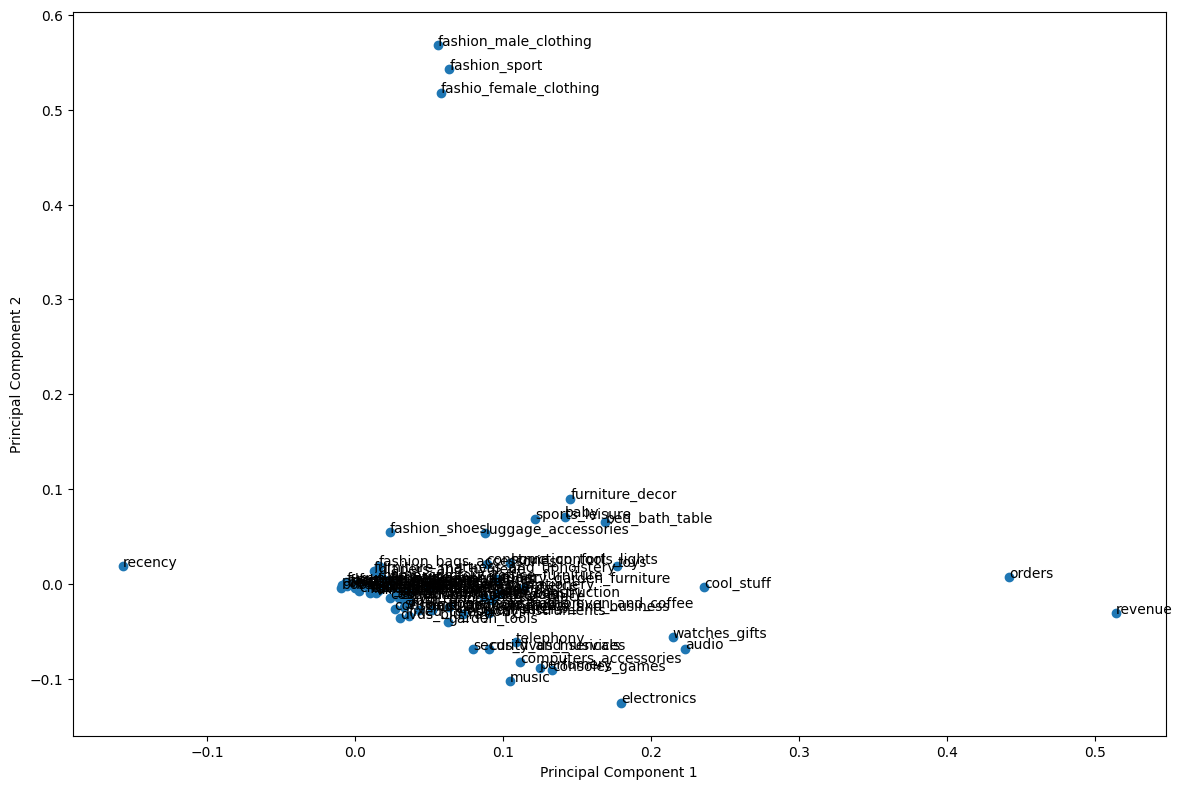

In [165]:
fig = plt.figure(figsize = (12,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [166]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

df_pca = pca_final.fit_transform(df_scaled)
df_pca.shape

(3090, 5)

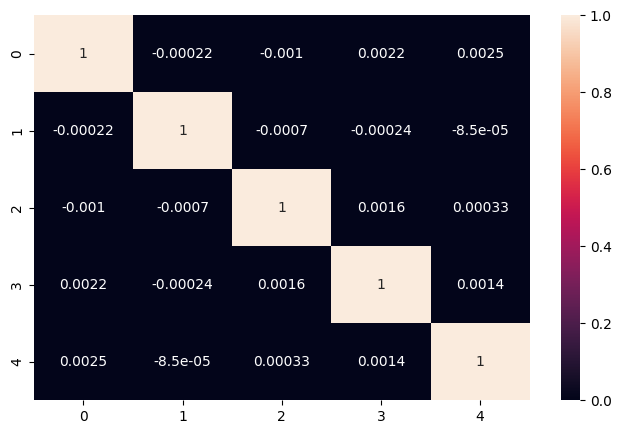

In [167]:
pc = np.transpose(df_pca)
corrmat = np.corrcoef(pc)

plt.figure(figsize = (8,5))
sns.heatmap(corrmat,annot = True)
plt.show()

In [168]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

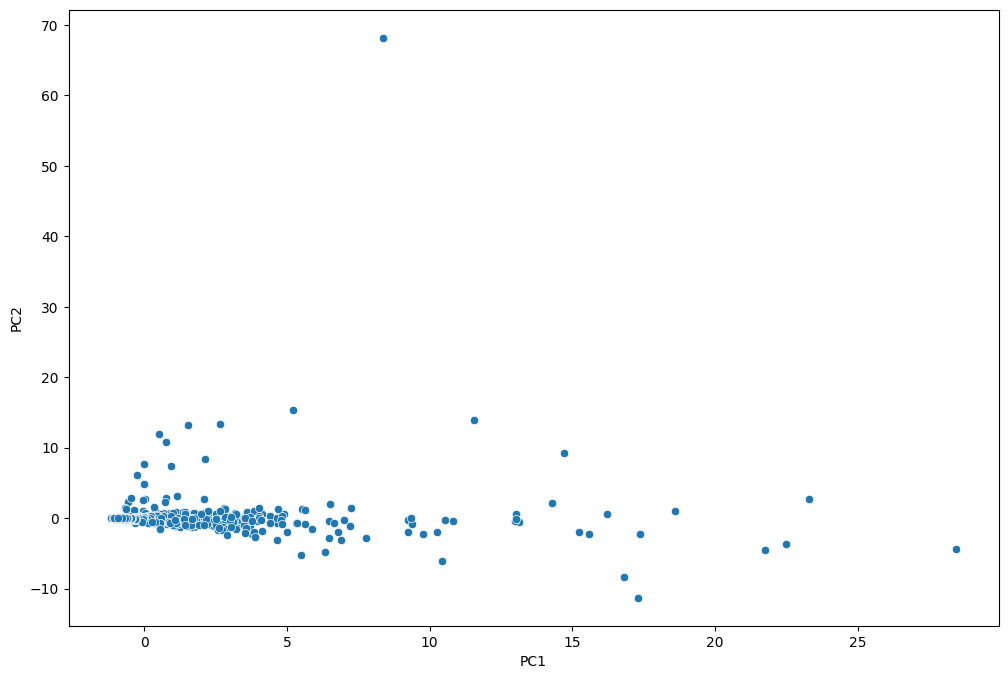

In [169]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

- looks like there is one outlier too in here

In [170]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [171]:
hopkins(pcs_df2)

0.9965956097779726

- hopkins value > 0.5 meaning it's good to be clustered

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

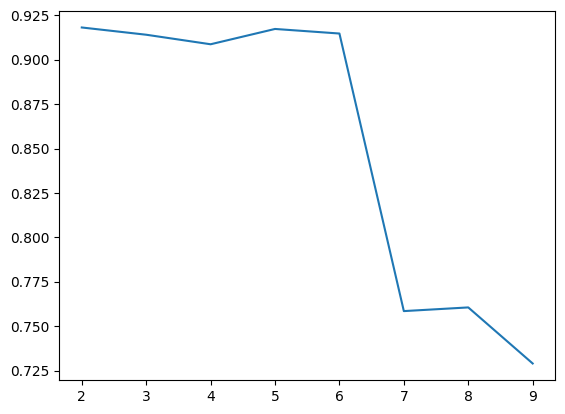

In [172]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

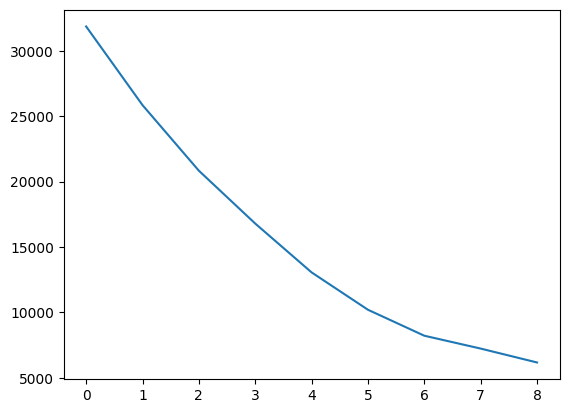

In [173]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
plt.show()

- we'll use k = 5

In [190]:
model_kmeans = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_kmeans.fit(pcs_df2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=5, random_state=50)

In [191]:
pcs_df2 = pd.concat([pcs_df2, pd.Series(model_kmeans.labels_)], axis=1)
pcs_df2.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']

In [192]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,13.140694,-0.535614,-4.360930,0.638153,0.282616,1
1,23.282722,2.685600,-18.373716,3.278711,-2.808209,1
2,10.831431,-0.434051,-3.636946,0.112457,-0.395800,1
3,9.251661,-0.200959,-3.528703,0.598225,-0.174447,1
4,13.014935,0.566926,-7.246419,1.158578,-0.854479,1


In [193]:
pcs_df2['ClusterID'].value_counts()

0    3048
1      36
2       3
3       2
4       1
Name: ClusterID, dtype: int64

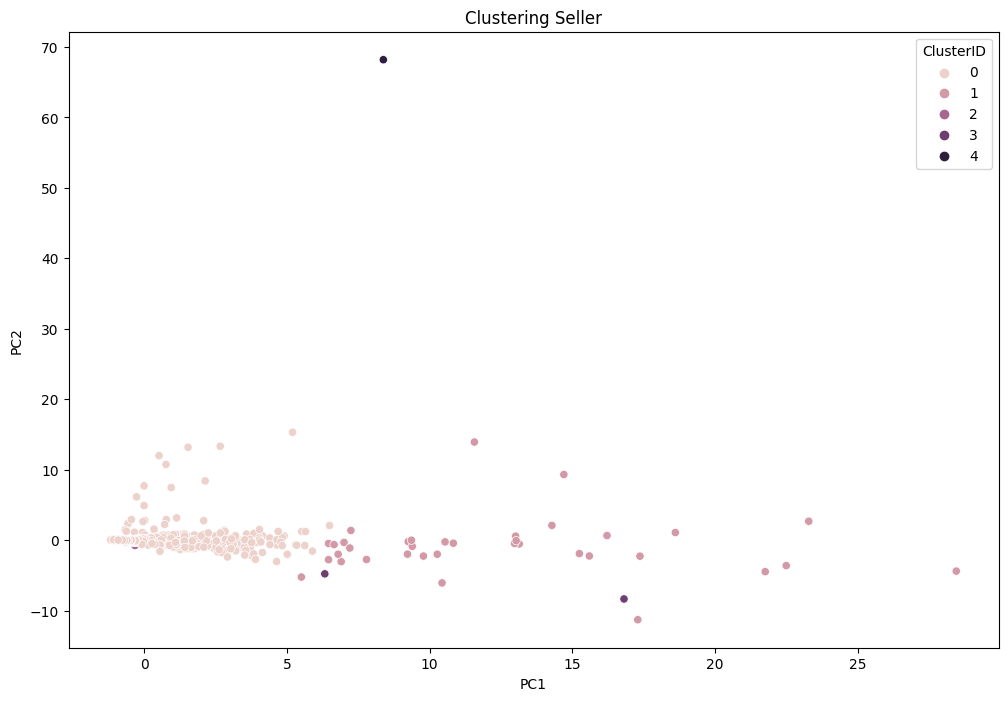

In [194]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pcs_df2)

plt.title('Clustering Seller')
plt.show()

- well it's kind of weird now

In [195]:
df_rev=pd.merge(df_rev,pcs_df2[['ClusterID']], left_index=True,right_index=True)

In [196]:
df_rev.head()

,seller_id,orders,revenue,recency,avg_rating,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,ClusterID
0,6560211a19b47992c3666cc44a7e94c0,1854,123304.83,4,3.909406,0.0,0.0,0.0,0.0,308.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,954.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.00,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.00,4221.0,1
1,4a3ca9315b744ce9f8e9374361493884,1806,200472.92,6,3.803931,0.0,0.0,0.0,0.0,0.0,0.0,306.7,19379.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1812.69,0.0,0.0,0.0,0.00,0.0,0.0,12.9,2771.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.78,0.0,1
2,cc419e0650a3c5ba77189a1882b7556a,1706,104288.42,6,4.069575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.99,0.0,0.0,0.00,0.0,0.0,0.0,1125.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1067.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.00,0.0,1
3,1f50f920176fa81dab994f9023523100,1404,106939.21,8,3.982402,0.0,0.0,0.0,0.0,0.0,0.0,303.6,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,414.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,38.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
4,da8622b14eb17ae2831f4ac5b9dab84a,1314,160236.57,5,4.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9033.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,19.90,0.0,0.0,0.0,59.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1


In [199]:
df_rev.groupby('ClusterID').agg(['mean','median'])

<ipython-input-199-a31b8a5f6777>:1: FutureWarning: ['seller_id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_rev.groupby('ClusterID').agg(['mean','median'])


orders              revenue                recency         \
                 mean median          mean     median        mean median   
ClusterID                                                                  
0           24.486220    6.0   3262.931972    797.200  141.708333   53.0   
1          680.611111  575.0  98445.646667  98407.680   15.750000   11.0   
2           92.000000   82.0   6202.836667   5340.390   67.333333   41.0   
3          244.000000  244.0  33270.255000  33270.255   10.500000   10.5   
4          105.000000  105.0   9376.950000   9376.950   32.000000   32.0   

          avg_rating           agro_industry_and_commerce         \
                mean    median                       mean median   
ClusterID                                                          
0           3.971915  4.170333                  12.581329    0.0   
1           4.086838  4.118629                  12.122222    0.0   
2           4.130106  4.213235                   0.000000    0.0   
3           3.826782  3.826782                  33.500000   33.5   
4           4.053571  4.053571                   0.000000    0.0   

          air_conditioning               art        arts_and_craftmanship  \
                      mean median       mean median                  mean   
ClusterID                                                                   
0                 9.029669    0.0   3.715577    0.0               0.45231   
1                12.216667    0.0  21.527778    0.0               0.00000   
2                 0.000000    0.0   0.000000    0.0               0.00000   
3                 0.000000    0.0   0.000000    0.0               0.00000   
4                 0.000000    0.0   0.000000    0.0               0.00000   

                       audio               auto                 baby         \
          median        mean median        mean   median        mean median   
ClusterID                                                                     
0            0.0    1.114701    0.0   79.081430    0.000   39.368520    0.0   
1            0.0  297.374167    0.0  120.963611    0.000  948.881111    0.0   
2            0.0   39.863333    0.0    0.000000    0.000    0.000000    0.0   
3            0.0  271.000000  271.0  872.945000  872.945    0.000000    0.0   
4            0.0    0.000000    0.0    0.000000    0.000    0.000000    0.0   

          bed_bath_table        books_general_interest        books_imported  \
                    mean median                   mean median           mean   
ClusterID                                                                      
0              59.732277    0.0               4.933209    0.0       0.910512   
1            1130.248889    0.0               1.638889    0.0       0.000000   
2               0.000000    0.0               0.000000    0.0       0.000000   
3               0.000000    0.0               0.000000    0.0       0.000000   
4               0.000000    0.0               0.000000    0.0       0.000000   

                 books_technical        cds_dvds_musicals         \
          median            mean median              mean median   
ClusterID                                                          
0            0.0        2.987218    0.0               0.0    0.0   
1            0.0        0.000000    0.0               0.0    0.0   
2            0.0       98.926667    0.0               0.0    0.0   
3            0.0        0.000000    0.0              55.0   55.0   
4            0.0        0.000000    0.0               0.0    0.0   

          christmas_supplies        cine_photo          computers         \
                        mean median       mean median        mean median   
ClusterID                                                                  
0                   1.078343    0.0   1.565151    0.0    8.379416    0.0   
1                   0.000000    0.0   0.000000    0.0  599.045833    0.0   
2                   0.000000    0.0   0.00000

### Seller Clustering with Revenue Breakdown Conclusion
- Cluster 4 is considered outlier because it has very high values on fashion and sports leisure revenues, maybe this specific seller is a branded sport fashion store
- Cluster 3 with just 2 seller have high orders, least recent, high revenue, high revenue on agro industry & commerce, auto, computer accessories, construction tools safety, electronics, garden tools, home constructions, home_appliances, pet shop, signaling & security and telephony; the only sellers who sell security & services and musical CDs and DVDs
- Cluster 2 have medium number of sales, medium revenue, and medium recency, high revenue on technical books, construction tools garden, flowers, tablets printing image
- Cluster 1 considered the best sellers as it has highest number of sales, highest revenue, and good recency, high revenue on art, audio, baby, bed_bath_table, computers, console games, construction tools, cool stuff, drinks, blu-ray DVDs, food, furniture, health_beauty, home comforts, housewares, luggage accessories, marketplace, music, musical instrument, perfumery, stationary, toys, and watches
- Cluster 0 is the most common sellers with low number of sales, low revenue, and least recency, most diverse product categories